In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score
import scipy.stats as scs
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data = pd.read_csv('../data/catanstats.csv')
data

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resource3,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,NaN,0,5,3,6,13,13,...,S,41,8,11,60,22,4,0,26,34
196,50,1,5,NaN,1,7,4,5,7,17,...,C,41,6,7,54,14,6,4,24,30
197,50,2,10,1.0,1,7,4,5,7,17,...,C,64,5,9,78,15,6,10,31,47
198,50,3,4,NaN,1,7,4,5,7,17,...,S,44,7,4,55,22,1,8,31,24


In [3]:
def rf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    model = RandomForestRegressor()
    fitted = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residual = y_test - y_pred
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_(y_test, y_pred)}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')

In [4]:
def ft_imp(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    model = RandomForestRegressor()
    fitted = model.fit(X_train, y_train)
    importance = model.feature_importances_
    names = X.columns
    result = pd.DataFrame(importance, index = names).sort_values(by = 0, ascending = False)
    return result

In [5]:
def accuracy_(y_test, prediction):
    mape = np.mean(np.abs((y_test-prediction)/np.abs(y_test)))
    return round(100*(1-mape),2)

In [69]:
win_data = data.drop(['player','me','gameNum','totalLoss','totalGain','totalAvailable','2','3','4','5','6','7','8','9','10','11','12'], axis = 1)
win_data = pd.get_dummies(win_data, columns = ['settlement1_resource1','settlement1_resource2','settlement1_resource3','settlement2_resource1','settlement2_resource2','settlement2_resource3'])

win_data1 = win_data[win_data['points'] >=10]
win_data1.head()

,points,settlement1,settlement1_num2,settlement1_num3,settlement2,settlement2_num2,settlement2_num3,production,tradeGain,robberCardsGain,...,settlement2_resource3_2S,settlement2_resource3_2W,settlement2_resource3_3G,settlement2_resource3_B,settlement2_resource3_C,settlement2_resource3_D,settlement2_resource3_L,settlement2_resource3_O,settlement2_resource3_S,settlement2_resource3_W
2,10,5,6,12,8,4,3,44,14,9,...,0,0,0,0,1,0,0,0,0,0
4,10,6,9,10,8,10,0,60,15,16,...,0,0,0,0,0,0,0,0,0,0
9,10,5,8,10,4,9,11,41,4,9,...,0,0,0,0,0,0,0,0,1,0
13,10,6,9,3,5,8,10,97,21,15,...,0,0,0,0,1,0,0,0,0,0
17,10,5,6,11,5,9,10,56,4,16,...,0,0,0,0,0,0,1,0,0,0


In [70]:
y_win = win_data1['points']
X_win = win_data1.drop('points', axis = 1)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_win, y_win)
model = RandomForestRegressor()
fit = model.fit(X_train, y_train)
win_pred = np.rint(model.predict(X_test))


In [42]:
ft_imp(X_win,y_win)

,0
settlement1_resource3_D,0.224550
settlement1_resource3_O,0.191452
settlement2_num2,0.122977
7,0.100333
12,0.035148
...,...
settlement1_resource3_W,0.000000
settlement1_resource3_S,0.000000
settlement1_resource3_2W,0.000000
settlement1_resource3_L,0.000000


In [7]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [72]:

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]},
                   random_state=42, verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_win, y_win)
rfmodel = RandomForestRegressor(n_estimators = 155, min_samples_split = 10, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 20, bootstrap = False)
fit = rfmodel.fit(X_train, y_train)
win_pred2 = np.rint(model.predict(X_test))
print(f'MSE: {mean_squared_error(y_test, win_pred2)}')
print(f'Accuracy: {accuracy_(y_test, win_pred2)}')
print(f'R2 Score: {r2_score(y_test, win_pred2)}')


MSE: 0.07692307692307693
Accuracy: 99.23
R2 Score: -0.08333333333333348


In [30]:
importance = rfmodel.feature_importances_
names = X_win.columns
important_feat = pd.DataFrame(importance, index = names).sort_values(by = 0, ascending = False)
important_feat.head(20)

,0
production,0.514703
robberCardsGain,0.108024
tribute,0.038187
robberCardsLoss,0.035970
settlement2_num2,0.026792
tradeGain,0.022071
tradeLoss,0.021870
settlement2_resource1_C,0.016486
settlement1_num2,0.015357
settlement2_num3,0.014990


In [33]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,40,50,60,70],
    'max_features': [2, 3],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [144, 155, 166, 177,188, 200]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.6min finished


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}


### Model with whole dataset

In [118]:
y_whole = win_data['points']
X = win_data.iloc[:,:13]
X_whole = X.drop('points',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_whole, y_whole)
model = RandomForestRegressor()
model.fit(X_train, y_train)
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]},
                   random_state=42, verbose=2)

In [119]:
rf_random.best_params_

{'n_estimators': 111,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [123]:
rfmodel = RandomForestRegressor(n_estimators = 111, min_samples_split = 10, min_samples_leaf = 4, max_features = 'auto', max_depth = 70, bootstrap = True)
fit = model.fit(X_train, y_train)

whole_pred = np.rint(model.predict(X_test))
print(f'MSE: {mean_squared_error(y_test, whole_pred )}')
print(f'Accuracy: {accuracy_(y_test, whole_pred)}')
print(f'R2 Score: {r2_score(y_test, whole_pred)}')

MSE: 1.98
Accuracy: 82.26
R2 Score: 0.443570143884892


In [201]:
importance = model.feature_importances_
names = X_whole.columns
important_feat = pd.DataFrame(importance, index = names).sort_values(by = 0, ascending = False)
important_feat['feature'] = important_feat.index
important_feat

,0,feature
production,0.545424,production
robberCardsGain,0.115394,robberCardsGain
tradeGain,0.046444,tradeGain
tribute,0.044408,tribute
robberCardsLoss,0.042729,robberCardsLoss
tradeLoss,0.038618,tradeLoss
settlement2_num2,0.035563,settlement2_num2
settlement1_num3,0.035040,settlement1_num3
settlement2,0.029069,settlement2
settlement1_num2,0.026898,settlement1_num2


No handles with labels found to put in legend.


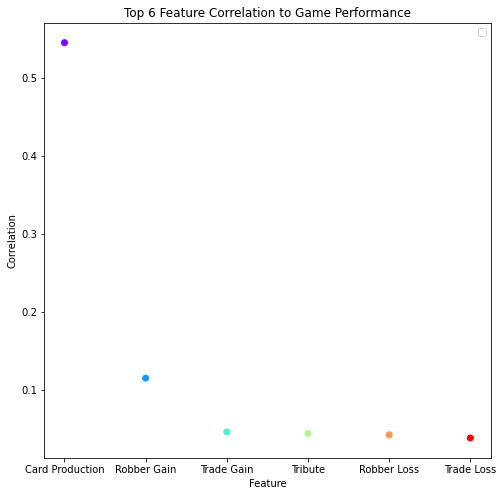

In [258]:
import matplotlib.cm as cm
top_5 = important_feat.iloc[:6,:]
colors = cm.rainbow(np.linspace(0, 1, len(top_5[0])))
# values = [val for i, val in important_feat[0].iteritems()]
label = ['Card Production', 'Robber Gain', 'Trade Gain', 'Tribute', 'Robber Loss', 'Trade Loss']
plt.figure(figsize= (8,8))
plt.scatter(top_5.feature, top_5[0], color = colors)
plt.title('Top 6 Feature Correlation to Game Performance')
plt.ylabel('Correlation')
plt.xlabel('Feature')
plt.xticks(np.array(top_5.feature),labels = label)
plt.legend()
# plt.savefig('top6feat.png')

In [8]:
smol = data[['points','production','tradeGain','tradeLoss','robberCardsGain','robberCardsLoss','tribute']]
smol

,points,production,tradeGain,tradeLoss,robberCardsGain,robberCardsLoss,tribute
0,5,38,5,10,2,2,4
1,9,48,8,11,6,1,8
2,10,44,14,24,9,4,0
3,5,42,12,24,0,6,0
4,10,60,15,28,16,10,0
...,...,...,...,...,...,...,...
195,5,41,8,22,11,4,0
196,5,41,6,14,7,6,4
197,10,64,5,15,9,6,10
198,4,44,7,22,4,1,8


In [15]:
X_smol = smol.drop('points', axis = 1)
y_smol = smol['points']

X_train, X_test, y_train, y_test = train_test_split(X_smol, y_smol)
model = RandomForestRegressor()
model.fit(X_train, y_train)
random_refined = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_refined.fit(X_train, y_train)
random_refined.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.9s finished


{'n_estimators': 111,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [23]:
refined_model = RandomForestRegressor(n_estimators = 111, min_samples_split = 10, min_samples_leaf = 4, max_features = 'auto', max_depth = 70, bootstrap = True)
refined_model.fit(X_train, y_train)
ref_pred = np.rint(refined_model.predict(X_test))

print(f'MSE: {mean_squared_error(y_test, ref_pred)}')
print(f'Accuracy: {accuracy_(y_test, ref_pred)}')
print(f'R2 Score: {r2_score(y_test, ref_pred)}')

MSE: 2.82
Accuracy: 78.25
R2 Score: 0.22535985056587182


### Linear Regression Model


In [68]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

In [69]:
summary_model(X_win,y_win)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.013
Date:                Thu, 25 Mar 2021   Prob (F-statistic):              0.547
Time:                        18:59:15   Log-Likelihood:                 28.979
No. Observations:                  50   AIC:                             28.04
Df Residuals:                       7   BIC:                             110.3
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.1514      0.832      6.190      0.000       3.184       7.119
settlement1                 -0.2970      0.192     -1.546      0.166      -0.751       0.157
settlement1_num2            -0.0468      0.089     -0.525      0.616      -0.258       0.164
settlement1_num3            -0.0444      0.051     -0.863      0.417      -0.166       0.077
settlement2                  0.0636      0.150      0.423      0.685      -0.292       0.419
settlement2_num2             0.0198      0.044      0.445      0.670      -0.085       0.125
settlement2_num3             0.0320      0.058      0.551      0.599      -0.105       0.169
production                   0.0444      0.020      2.229      0.061      -0.003       0.092
tradeGain                    0.0839      0.077      1.085      0.314      -0.099       0.267
robberCardsGain             -0.0226      0.040     -0.559      0.594      -0.118       0.073
tradeLoss                   -0.0707      0.038     -1.837      0.109      -0.162       0.020
robberCardsLoss             -0.0497      0.031     -1.621      0.149      -0.122       0.023
tribute                     -0.0677      0.054     -1.244      0.254      -0.196       0.061
settlement1_resource1_C      0.5877      0.327      1.798      0.115      -0.185       1.361
settlement1_resource1_L      1.4497      0.379      3.827      0.006       0.554       2.345
settlement1_resource1_O      0.3349      0.647      0.518      0.621      -1.195       1.865
settlement1_resource1_S      1.1371      0.339      3.352      0.012       0.335       1.939
settlement1_resource1_W      1.6420      0.569      2.887      0.023       0.297       2.987
settlement1_resource2_C      0.6803      0.314      2.168      0.067      -0.062       1.423
settlement1_resource2_L      0.6596      0.564      1.169      0.281      -0.675       1.994
settlement1_resource2_O      0.8580      0.301      2.852      0.025       0.147       1.569
settlement1_resource2_S      1.4915      0.448      3.331      0.013       0.433       2.550
settlement1_resource2_W      1.4620      0.630      2.321      0.053      -0.028       2.952
settlement1_resource3_2L -2.844e-15   2.52e-15     -1.128      0.297   -8.81e-15    3.12e-15
settlement1_resource3_2S     0.5477      0.584      0.937      0.380      -0.834       1.930
settlement1_resource3_2W  6.667e-15    4.7e-15      1.418      0.199   -4.45e-15    1.78e-14
settlement1_resource3_3G  7.922e-15   3.94e-15      2.013      0.084   -1.38e-15    1.72e-14
settlement1_resource3_C     -0.0434      0.356     -0.122      0.906      -0.885       0.798
settlement1_resource3_D      2.3859      0.727      3.283      0.013       0.667       4.104
settlement1_resource3_L      0.6919      0.325      2.129      0.071      -0.076       1.460
settlement1_re

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_win, y_win)
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, lr_pred)}')
print(f'Accuracy: {accuracy_(y_test, lr_pred)}')
print(f'R2 Score: {r2_score(y_test, lr_pred)}')

MSE: 3.480271460822431
Accuracy: 85.61
R2 Score: -9.502962087124837


In [103]:
importance = lr.coef_

names = X_win.columns

lr_importance = pd.DataFrame(importance, index = names).sort_values(by = 0, ascending = False)

lr_importance

,0
settlement2_resource3_2L,1.256920e+00
settlement1_resource2_S,1.158869e+00
settlement2_resource1_S,9.605109e-01
settlement1_resource3_O,7.203904e-01
settlement1_resource1_C,6.089906e-01
settlement2_resource1_C,5.513202e-01
settlement2_resource3_3G,5.109099e-01
settlement1_resource3_S,4.493153e-01
settlement2_resource2_C,3.987485e-01
settlement1_resource1_S,2.827989e-01


In [74]:
new_data = data.drop(['player','me','gameNum','totalLoss','totalGain','totalAvailable','2','3','4','5','6','7','8','9','10','11','12','settlement1_resource1','settlement1_resource2','settlement1_resource3','settlement2_resource1','settlement2_resource2','settlement2_resource3','settlement1','settlement1_num2','settlement1_num3','settlement2','settlement2_num2','settlement2_num3'], axis = 1)
new_data

,points,production,tradeGain,robberCardsGain,tradeLoss,robberCardsLoss,tribute
0,5,38,5,2,10,2,4
1,9,48,8,6,11,1,8
2,10,44,14,9,24,4,0
3,5,42,12,0,24,6,0
4,10,60,15,16,28,10,0
...,...,...,...,...,...,...,...
195,5,41,8,11,22,4,0
196,5,41,6,7,14,6,4
197,10,64,5,9,15,6,10
198,4,44,7,4,22,1,8


In [75]:
X_new = new_data.drop('points',axis = 1)
y_new = new_data['points']

summary_model(X_new,y_new)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     49.18
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           2.32e-36
Time:                        19:11:08   Log-Likelihood:                -344.05
No. Observations:                 200   AIC:                             702.1
Df Residuals:                     193   BIC:                             725.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2458      0.374      3.329      0.001       0.508       1.984
production          0.1498      0.012     12.689      0.000       0.127       0.173
tradeGain           0.1834      0.046      3.965      0.000       0.092       0.275
robberCardsGain     0.1263      0.023      5.560      0.000       0.081       0.171
tradeLoss          -0.1473      0.025     -5.816      0.000      -0.197      -0.097
robberCardsLoss    -0.1494      0.033     -4.462      0.000      -0.215      -0.083
tribute            -0.1469      0.022     -6.804      0.000      -0.189      -0.104
==============================================================================
Omnibus:                        3.599   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.385
Skew:                           0.043   Prob(JB):                        0.304
Kurtosis:                       2.472   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new)
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, lr_pred)}')
print(f'Accuracy: {accuracy_(y_test, lr_pred)}')
print(f'R2 Score: {r2_score(y_test, lr_pred)}')

MSE: 1.533493061246352
Accuracy: 86.12
R2 Score: 0.6835809959461967


In [99]:
importance = lr.coef_

names = X_new.columns

lr_importance = pd.DataFrame(importance, index = names).sort_values(by = 0, ascending = False)

lr_importance

,0
tradeGain,0.164825
production,0.148118
robberCardsGain,0.112663
tradeLoss,-0.131977
tribute,-0.136741
robberCardsLoss,-0.146430


In [104]:
refined_data = new_data.drop(['tradeLoss','tribute','robberCardsLoss'], axis = 1)

refined_data

,points,production,tradeGain,robberCardsGain
0,5,38,5,2
1,9,48,8,6
2,10,44,14,9
3,5,42,12,0
4,10,60,15,16
...,...,...,...,...
195,5,41,8,11
196,5,41,6,7
197,10,64,5,9
198,4,44,7,4


In [113]:
X_refined = refined_data.drop('points', axis = 1)
y_refined = refined_data['points']

X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined)
lr_refined = LinearRegression()
refined_model = lr_refined.fit(X_train, y_train)
ypred = lr_refined.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, ypred)}')
print(f'Accuracy: {accuracy_(y_test, ypred)}')
print(f'R2 Score: {r2_score(y_test, ypred)}')

summary_model(X_refined, y_refined)

MSE: 2.667755577364552
Accuracy: 81.64
R2 Score: 0.44537306083897044


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     56.87
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.72e-26
Time:                        19:32:37   Log-Likelihood:                -374.21
No. Observations:                 200   AIC:                             756.4
Df Residuals:                     196   BIC:                             769.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.3111      0.399      5.785      0.000       1.523       3.099
production          0.0796      0.009      9.241      0.000       0.063       0.097
tradeGain           0.0278      0.029      0.954      0.341      -0.030       0.085
robberCardsGain     0.0892      0.026      3.485      0.001       0.039       0.140
==============================================================================
Omnibus:                        2.544   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.295
Skew:                           0.172   Prob(JB):                        0.317
Kurtosis:                       2.603   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""